#  Project: Investigate a Dataset - [World happiness report dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: Olympics dataset 

>The United Nation’s Sustainable Development Solutions Network published the world happiness report on 19th March 2021 that ranks the world's 149 countries on how happy their citizens perceive themselves to be based on various indicators. The happiness study ranks the countries on the basis of questions from the Gallup World Poll. The results are then equated with other factors such as GDP, life expectancy, generosity, etc. In the year 2021, it focused on the effects of the Covid-19 pandemic and how people all over the world have managed to survive and prosper.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from matplotlib import rcParams
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [19]:
df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [21]:
df.shape

(149, 20)

## Data Cleaning
### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes

###  The Cleaning Process:
>I removed columns that are not necessary for my analysis: 'standard_error_of_ladder_score','upperwhisker','lowerwhisker', 'explained_by:_log_gdp_per_capita', 'explained_by:_social_support', 'explained_by:_healthy_life_expectancy', 'explained_by:_freedom_to_make_life_choices', 'explained_by:_generosity', 'explained_by:_perceptions_of_corruption','dystopia_+_residual' to improve database redability.

>I checked for null values.

>I checked for duplicates.

In [22]:
df.duplicated().sum()

0

In [23]:
df.rename(columns= lambda x: x.strip().lower().replace(' ','_'), inplace = True)

In [24]:
df.drop(['standard_error_of_ladder_score','upperwhisker','lowerwhisker', 'explained_by:_log_gdp_per_capita', 'explained_by:_social_support',
         'explained_by:_healthy_life_expectancy', 'explained_by:_freedom_to_make_life_choices', 'explained_by:_generosity', 'explained_by:_perceptions_of_corruption',
         'dystopia_+_residual', 'ladder_score_in_dystopia'], axis = 1, inplace=True)

In [25]:
df.head()

,country_name,regional_indicator,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ladder_score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
logged_gdp_per_capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
social_support,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983
healthy_life_expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
freedom_to_make_life_choices,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
generosity,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
perceptions_of_corruption,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939


In [27]:
df.columns

Index(['country_name', 'regional_indicator', 'ladder_score',
       'logged_gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

In [28]:
df_num = df.drop(columns = ['country_name', 'regional_indicator'])

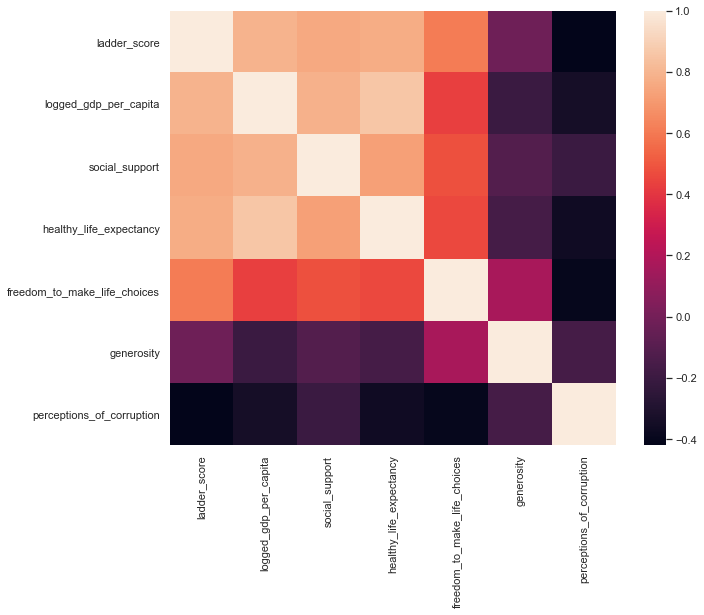

In [29]:
plt.figure(figsize  = (10,8))
sns.heatmap(df_num.corr());

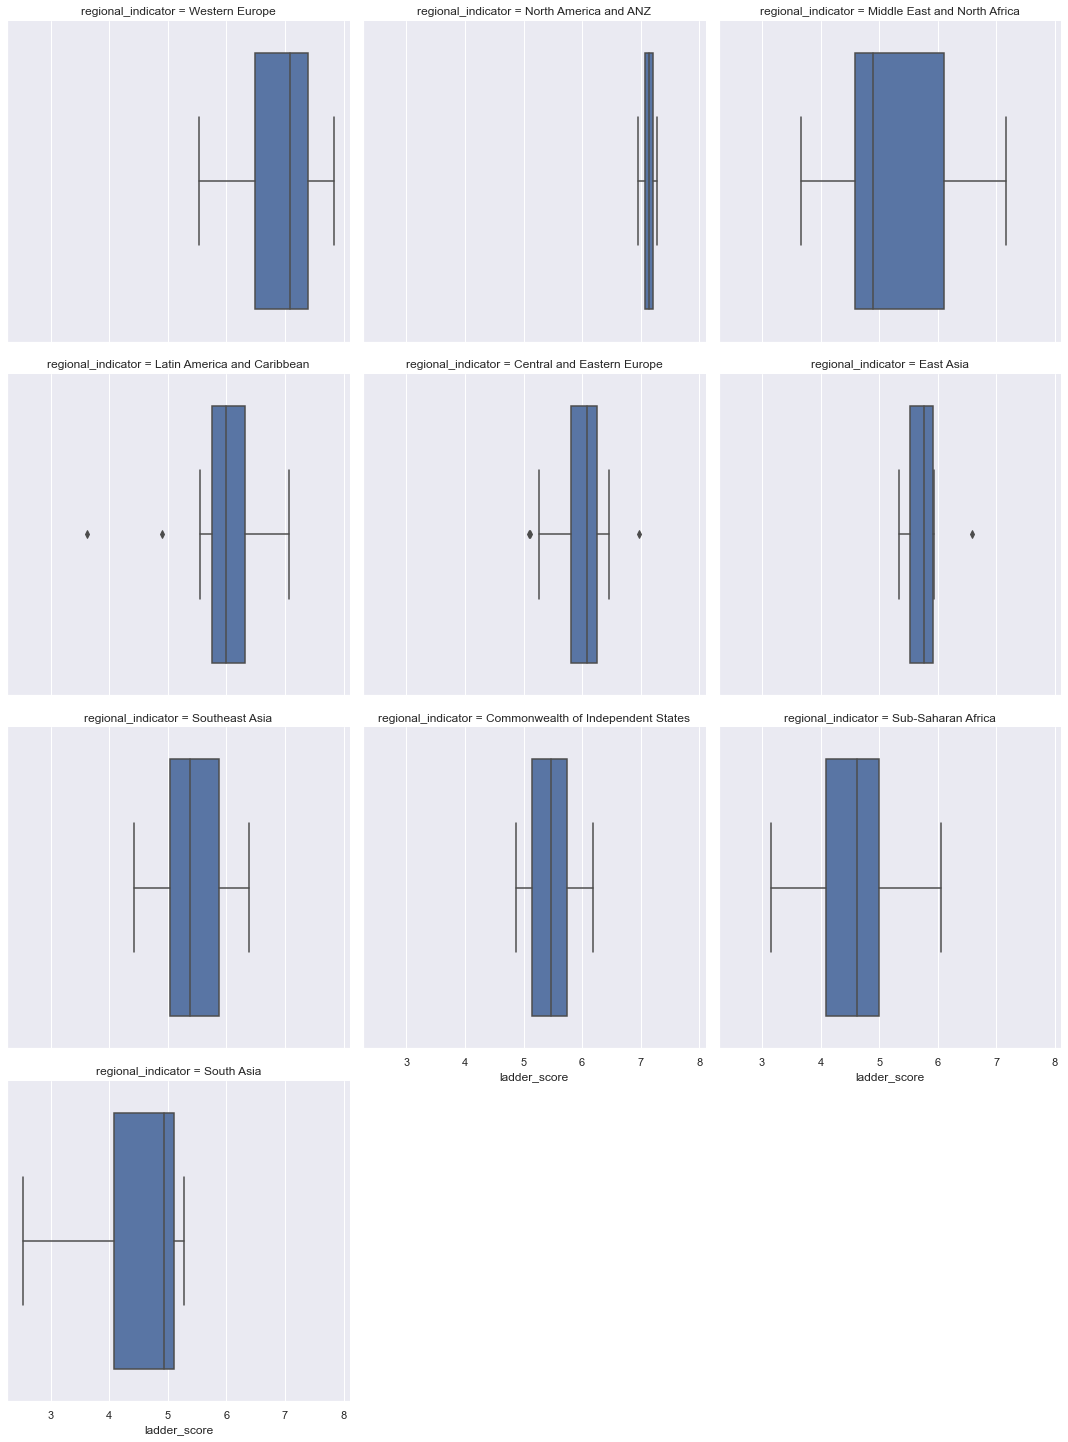

In [75]:
sns.catplot(x= 'ladder_score', data = df, col = 'regional_indicator', kind = 'box', col_wrap = 3 );

>The data doesn't has a lot of outliers so it's indicative and representative, south asia seems like the saddest place on earth, some countries have a happiness score around 2.5 which is very low.

>North america has the lowest range and its ladder score is very high, so you have a high chance being happy there.

In [30]:
df_num.columns

Index(['ladder_score', 'logged_gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

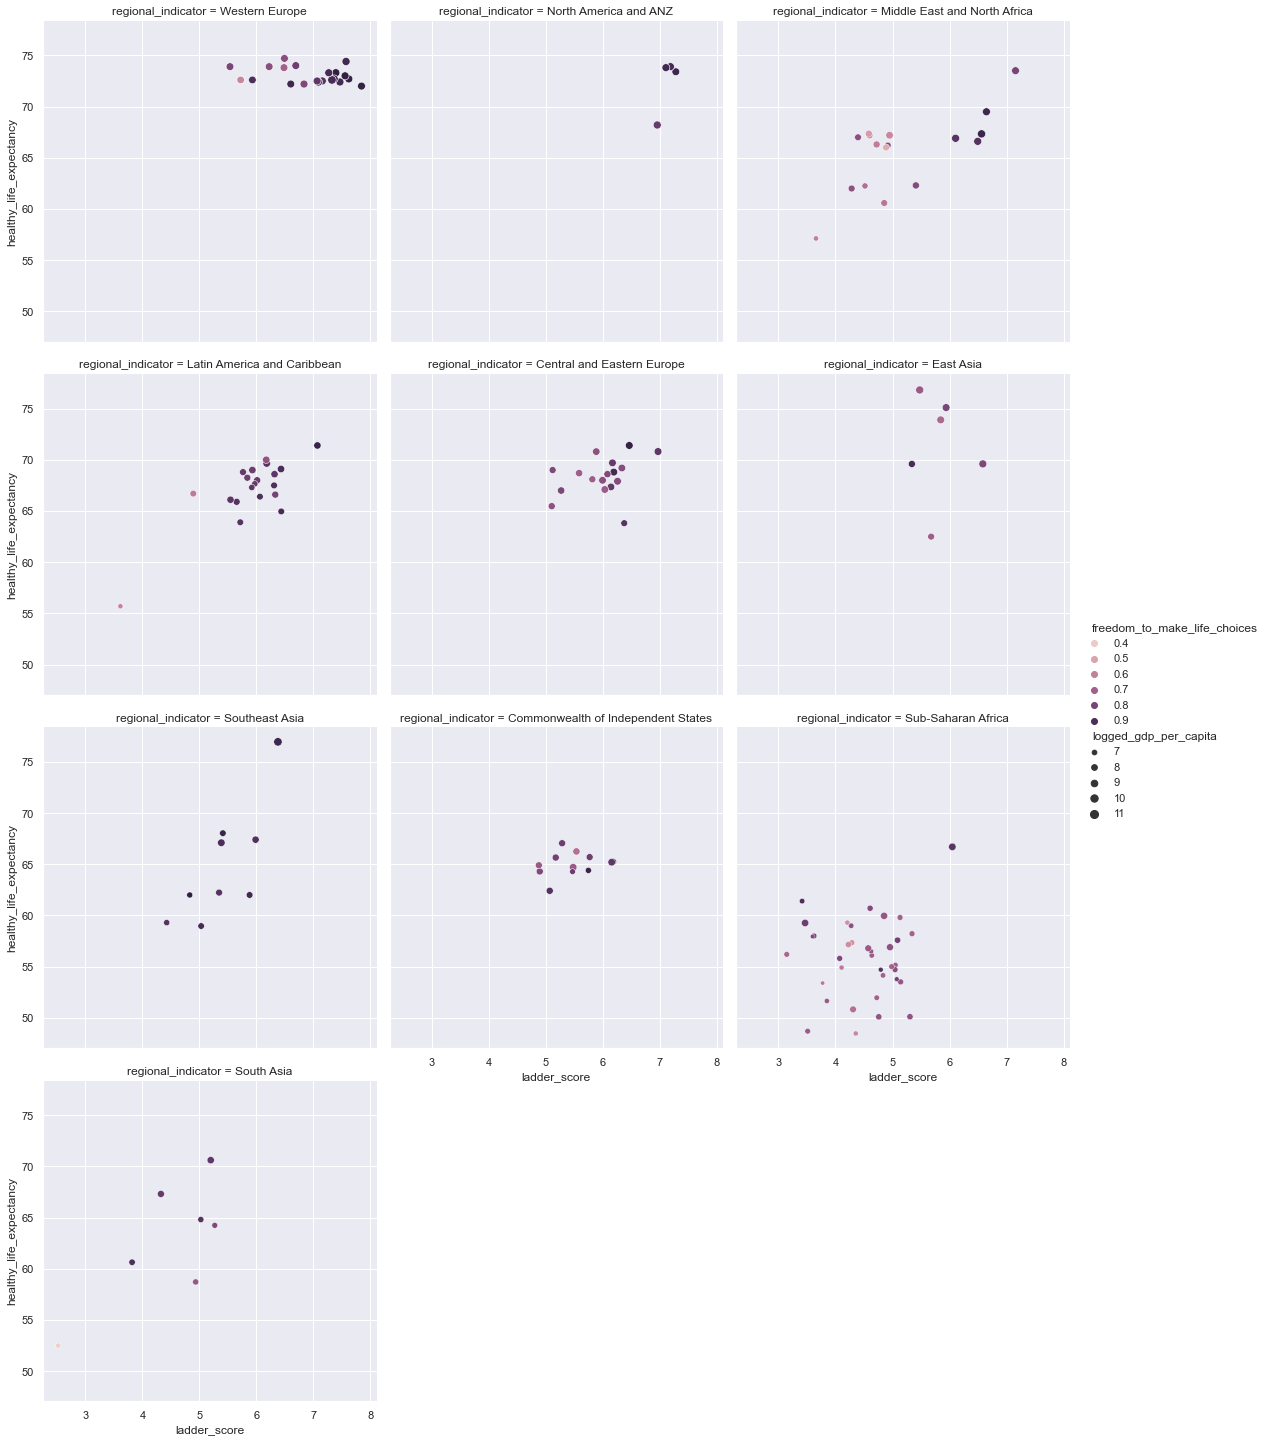

In [44]:
sns.relplot(x= 'ladder_score', y ='healthy_life_expectancy'  ,data = df, kind = 'scatter',
           col = 'regional_indicator',col_wrap = 3, size = 'logged_gdp_per_capita', hue = 'freedom_to_make_life_choices'  );

> Here I have set a relation between both happiness and healthy_life_expectancy, setting another indicators by using color to represent freedom_to_make_decesions, and size to represent the gdp, it seems like there is a positive relation, every region has its own charactersitics but in general the higher the freedom in decisions and gdp will result in a  higher happiness score.

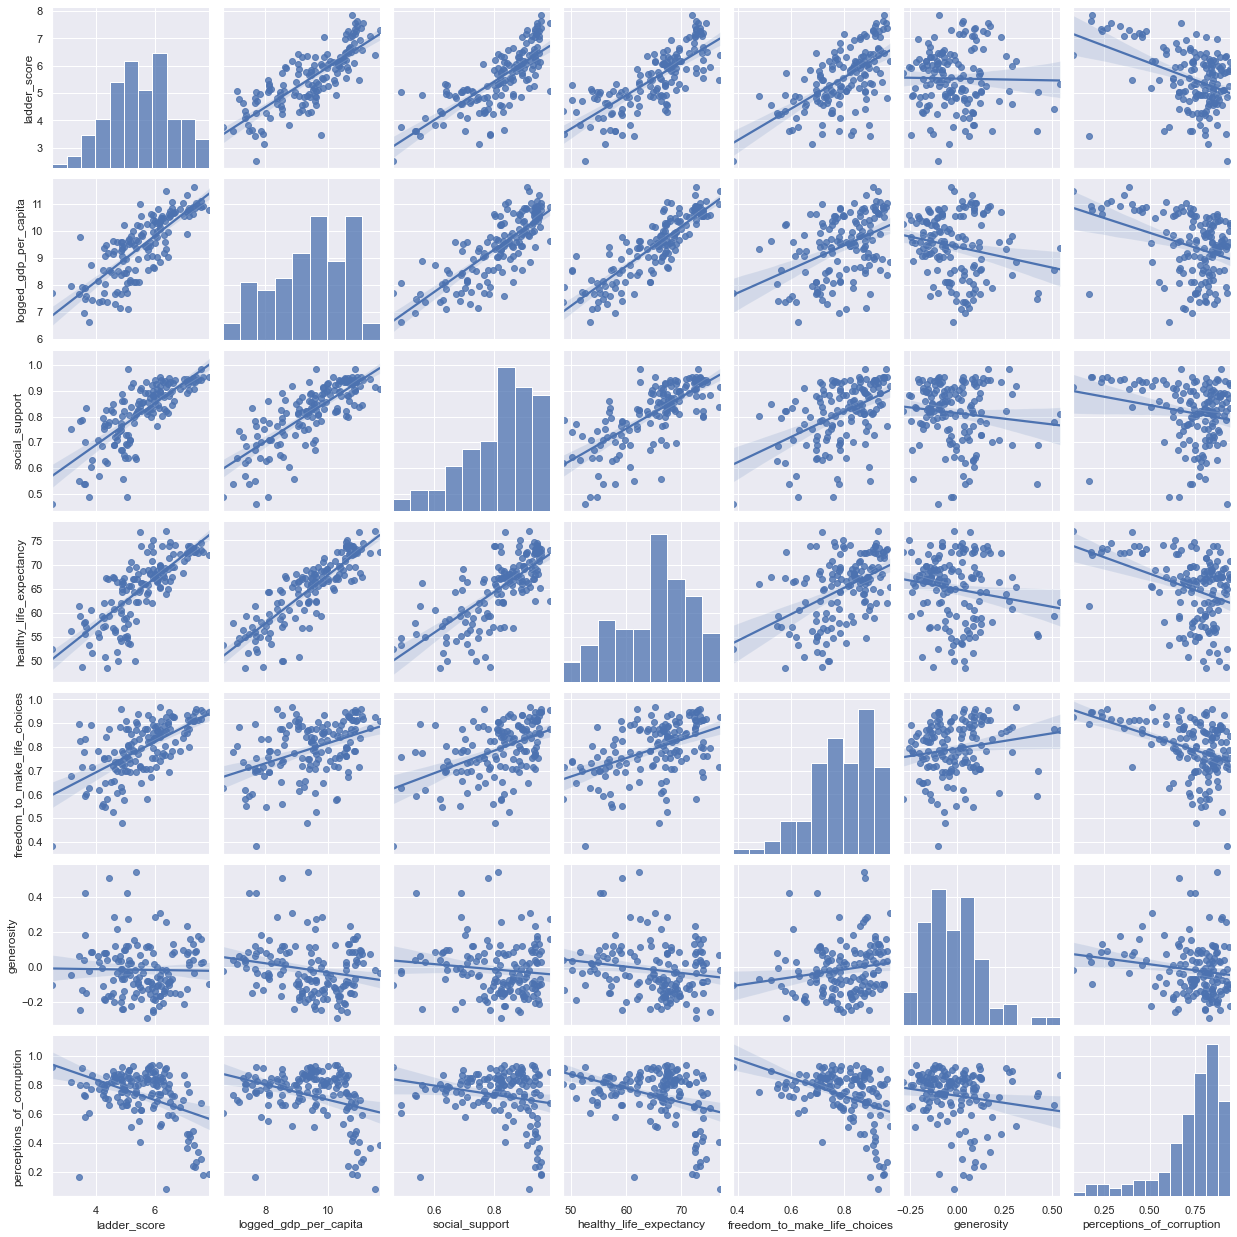

In [34]:
sns.pairplot(df, vars = df_num.columns, kind = 'reg', diag_kind = 'hist');

>Ladder_score has a positive relationship with gdp, social support, healthy life expectancy, freedom to make choices, there is no relation with generousity and finally a negative relationship with perceptions of corruption.

# Using Linear Regression to make a predictive Model

In [84]:
df_num.columns

Index(['ladder_score', 'logged_gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

In [45]:
df['intercept'] = 1

In [46]:
df.head()

,country_name,regional_indicator,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,intercept
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,1
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,1
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,1
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,1
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,1


In [47]:
X = df[['intercept', 'logged_gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices']]

y = df['ladder_score']


In [48]:
lm = sm.OLS(df['ladder_score'], df[['intercept', 'logged_gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ladder_score   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     104.7
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           1.27e-41
Time:                        19:37:24   Log-Likelihood:                -119.97
No. Observations:                 149   AIC:                             249.9
Df Residuals:                     144   BIC:                             265.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -3.1116      0.457     -6.808      0.000      -4.015      -2.208
logged_gdp_per_capita            0.2918      0.086      3.381      0.001       0.121       0.462
social_support                   2.1659      0.662      3.270      0.001       0.857       3.475
healthy_life_expectancy          0.0331      0.013      2.463      0.015       0.007       0.060
freedom_to_make_life_choices     2.4982      0.465      5.378      0.000       1.580       3.416
==============================================================================
Omnibus:                        9.504   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.477
Skew:                          -0.557   Prob(JB):                      0.00875
Kurtosis:                       3.535   Cond. No.                         998.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> We have an r_squared_score of 0.744 which is pretty good, which means we can rely on the this relation, besides the p_value is very small for all parameters, which means that all paramaters have a significant influence on the happiness score.

# Checking for colinearity

In [76]:
y, X = dmatrices('ladder_score ~ logged_gdp_per_capita + social_support + healthy_life_expectancy + freedom_to_make_life_choices ', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 

In [77]:
vif

,VIF Factor,features
0,102.645321,Intercept
1,4.882355,logged_gdp_per_capita
2,2.826338,social_support
3,4.025146,healthy_life_expectancy
4,1.352807,freedom_to_make_life_choices


>NO feature passed 10 in VIF Factor, so we can be sure that the effect of colinearity is not significant on the result.

# Using Sklearn to predict our model

In [78]:
lm = LinearRegression()
lm

LinearRegression()

In [79]:
X = df[['intercept', 'logged_gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices']]

y = df['ladder_score']

In [80]:
lm.fit(X,df['ladder_score'])

LinearRegression()

In [81]:
lm.intercept_

-3.111566322563304

In [82]:
lm.coef_

array([0.        , 0.29181588, 2.16586372, 0.03307704, 2.49816587])

In [83]:
lm.score(X,y)

0.7442087637319912

the same 0.744 appeared again

# Predicting the data

In [84]:
#predict the data from X
Y_hat = lm.predict(X)

C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


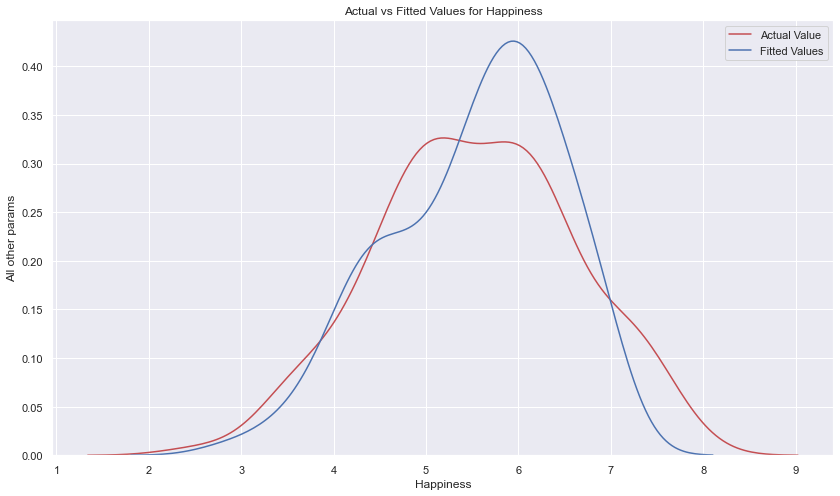

In [85]:
plt.figure(figsize=(14, 8))

ax1 = sns.distplot(df['ladder_score'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Happiness')
plt.xlabel('Happiness')
plt.ylabel('All other params')
plt.legend()
plt.show()
plt.close()

>The model seems to have done a nice job predicting our output, but still there is a space for improvement

## Using train_test_split and see how good our model will predict the ladder_score

In [86]:
x = df[['intercept', 'logged_gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices']]

y = df['ladder_score']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
                 x, df['ladder_score'], test_size=0.2, random_state=0)


lm_full = LinearRegression()
lm_full.fit(X_train, y_train)
lm_full.score(X_test, y_test)

0.7436350454887464

> Our test data have almost the same R_squared as our data, which is pretty good, as it's an indication that our model can deal with real-life data.

<a id='conclusions'></a>
# Conclusions:

>The data doesn't has a lot of outliers so it's indicative and representative, south asia seems like the saddest place on earth, some countries have a happiness score around 2.5 which is very low.

>North america has the lowest range and its ladder score is very high, so you have a high chance being happy there.

>I have set a relation between both happiness and healthy_life_expectancy, setting another indicators by using color to represent freedom_to_make_decesions, and size to represent the gdp, it seems like there is a positive relation, every region has its own charactersitics but in general the higher the freedom in decisions and gdp will result in a  higher happiness score.

>Ladder_score has a positive relationship with gdp, social support, healthy life expectancy, freedom to make choices, there is no relation with generousity and finally a negative relationship with perceptions of corruption.

>Our model have an r_squared_score of 0.744 which is pretty good, which means we can rely on the this relation, besides the p_value is very small for all parameters, which means that all paramaters have a significant influence on the happiness score.

>after checking for colinearity, NO feature passed 10 in VIF Factor, so we can be sure that the effect of colinearity is not significant on the result.

>After spliting the data, test data have almost the same R_squared as our data, which is pretty good, as it's an indication that our model can deal with real-life data.